In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define grid size


In [2]:
GRID_SIZE = (101, 101, 101)  # 3D Grid from (0,0,0) to (100,100,100)


# Create grid with random weights


In [3]:
np.random.seed(42)                      # For reproducibility
grid = np.zeros(GRID_SIZE)
num_high_weight_points = 500            # Adjust as needed
high_weight_value = 100                 # High penalty for some points

# Assign high weights randomly


In [4]:
for _ in range(num_high_weight_points):
    x, y, z = np.random.randint(0, 101, 3)
    grid[x, y, z] = high_weight_value

# A* Algorithm for 3D Pathfinding


In [5]:
def heuristic(a, b):
    """Euclidean distance heuristic"""
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star_3d(grid, start, goal):
    """Finds shortest path in a 3D grid using A*"""
    neighbors = [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for dx, dy, dz in neighbors:
            neighbor = (current[0] + dx, current[1] + dy, current[2] + dz)

            if 0 <= neighbor[0] < GRID_SIZE[0] and 0 <= neighbor[1] < GRID_SIZE[1] and 0 <= neighbor[2] < GRID_SIZE[2]:
                tentative_g_score = g_score[current] + 1 + grid[neighbor]
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    
    return None  # No path found


# User input start & end points


In [6]:
start1, end1 = (0, 0, 0), (50, 50, 50)
start2, end2 = (10, 10, 10), (80, 80, 80)


# Compute paths


In [7]:
path1 = a_star_3d(grid, start1, end1)
path2 = a_star_3d(grid, start2, end2)

# Ensure time collision avoidance
# Assign each path a different velocity and check intersections

# Plot paths

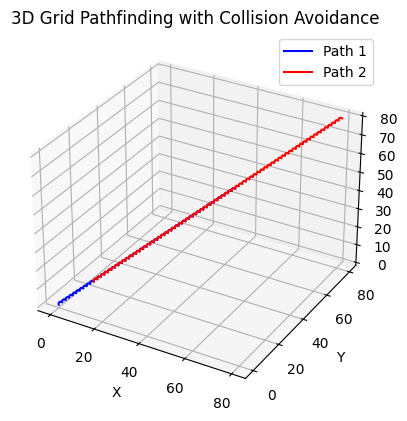

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot_path(ax, path, color, label):
    if path:
        x, y, z = zip(*path)
        ax.plot(x, y, z, color=color, label=label)

plot_path(ax, path1, 'blue', "Path 1")
plot_path(ax, path2, 'red', "Path 2")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Grid Pathfinding with Collision Avoidance")
ax.legend()
plt.show()

In [72]:
from dronekit import connect, VehicleMode, LocationGlobalRelative
import time
import math
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from dronekit import connect, VehicleMode

In [22]:
vehicle = connect('127.0.0.1:14550', wait_ready=True, timeout=60)  # Increase timeout

ERROR:dronekit.mavlink:Exception in MAVLink input loop
Traceback (most recent call last):
  File "C:\Users\rohit kumar\AppData\Roaming\Python\Python39\site-packages\dronekit\mavlink.py", line 211, in mavlink_thread_in
    fn(self)
  File "C:\Users\rohit kumar\AppData\Roaming\Python\Python39\site-packages\dronekit\__init__.py", line 1370, in listener
    raise APIException('No heartbeat in %s seconds, aborting.' %
dronekit.APIException: No heartbeat in 30 seconds, aborting.


APIException: Timeout in initializing connection.

In [158]:
waypoints = [
    {'lat': 37.7749, 'lon': -122.4194, 'alt': 100},
    {'lat': 37.7750, 'lon': -122.4585, 'alt': 60},
    {'lat': 37.7752, 'lon': -122.4675, 'alt': 55},
    {'lat': 37.7754, 'lon': -122.4264, 'alt': 170},
    {'lat': 37.7770, 'lon': -122.4155, 'alt': 75},
    {'lat': 37.7762, 'lon': -122.4145, 'alt': 80},
    {'lat': 37.7799, 'lon': -122.4190, 'alt': 85},
    {'lat': 37.7760, 'lon': -122.4189, 'alt': 86},
    {'lat': 37.7792, 'lon': -122.4476, 'alt': 155},
    {'lat': 37.7774, 'lon': -122.4360, 'alt': 172},
    {'lat': 37.7790, 'lon': -122.4559, 'alt': 40},
    {'lat': 37.7782, 'lon': -122.4170, 'alt': 150},
    {'lat': 37.7757, 'lon': -122.4292, 'alt': 128},
    {'lat': 37.7758, 'lon': -122.4283, 'alt': 130},
    {'lat': 37.7759, 'lon': -122.4154, 'alt': 0},
]

# Convert waypoints into DroneKit Locations

In [159]:
mission_items = []
for waypoint in waypoints:
    lat = waypoint['lat']
    lon = waypoint['lon']
    alt = waypoint['alt']
    mission_items.append(LocationGlobalRelative(lat, lon, alt))

# Function to calculate distance between two points (Haversine formula)

In [160]:
def calculate_distance(wp1, wp2):
    R = 6371000  # Earth radius in meters
    lat1, lon1 = math.radians(wp1.lat), math.radians(wp1.lon)
    lat2, lon2 = math.radians(wp2.lat), math.radians(wp2.lon)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1-a))

# Plan mission

In [161]:
vehicle.flush() 
vehicle.commands.clear()

for item in mission_items:
    vehicle.commands.add(item)

vehicle.commands.upload() 

NameError: name 'vehicle' is not defined

# After 10 waypoints, insert a new one 100m perpendicular

In [162]:
if len(mission_waypoints) > 10:
    last_wp = mission_waypoints[9]
    new_wp = LocationGlobalRelative(last_wp.lat, last_wp.lon + 0.0009, last_wp.alt)  # Approx 100m east
    vehicle.commands.add(new_wp)

vehicle.commands.upload()

NameError: name 'vehicle' is not defined

# Start mission

In [163]:
vehicle.armed = True
vehicle.mode = VehicleMode("AUTO")

NameError: name 'vehicle' is not defined

# Monitor mission progress

In [164]:
distances = []
while True:
    next_wp = vehicle.commands.next
    if next_wp >= len(mission_waypoints):
        print("Mission Complete!")
        break
    remaining_distance = calculate_distance(vehicle.location.global_relative_frame, mission_waypoints[next_wp])
    distances.append(remaining_distance)
    print(f"Next Waypoint: {next_wp}, Distance: {remaining_distance:.2f} meters")
    time.sleep(2)


NameError: name 'vehicle' is not defined

# Plot 2D path

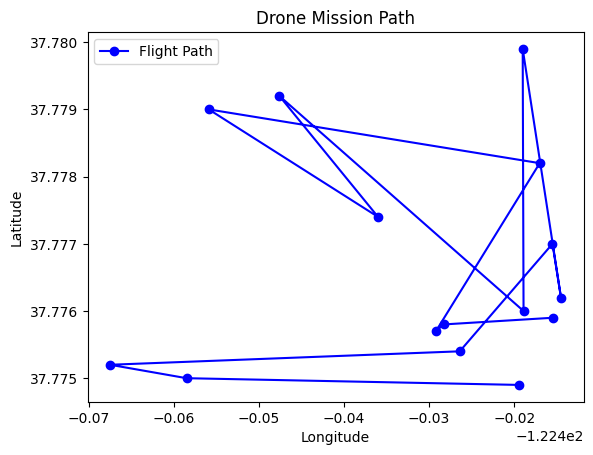

NameError: name 'vehicle' is not defined

In [167]:
latitudes = [wp['lat'] for wp in waypoints]
longitudes = [wp['lon'] for wp in waypoints]
plt.plot(longitudes, latitudes, 'bo-', label="Flight Path")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Drone Mission Path")
plt.legend()
plt.show()

vehicle.close()